### Feature Engineering

In [2]:
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt
def load_dataset(file_path):
  return pd.read_csv(file_path)


df = load_dataset("titanic.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Shows count of missing values per column
print(df.isnull().sum()) 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Removing the missing value

In [4]:
# Remove missing values

# Drop rows with any missing values
df_dropped_rows = df.dropna()
print("\nDataFrame after dropping rows with missing values:")
print(df_dropped_rows)


DataFrame after dropping rows with missing values:
     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..               

### Handling the missing value

In [ ]:
# Impute missing values with the mean
df_mean = df
df_mean['Age']=df_mean['Age'].fillna(df_mean['Age'].mean())
print("\nDataFrame after imputing numerical columns with mean:")
print(df_mean)



DataFrame after imputing numerical columns with mean:
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                        

In [9]:
# Impute missing values with the mode
df_mode = df
df_mode['Cabin'].fillna(df_mode['Cabin'].mode()[0], inplace=True)
df_mode['Embarked'].fillna(df_mode['Embarked'].mode()[0], inplace=True)

print("\nDataFrame after imputing categorical columns with mode:")
print(df_mode)


DataFrame after imputing categorical columns with mode:
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                      

C:\Users\HP\AppData\Local\Temp\ipykernel_11348\2133044553.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mode['Embarked'].fillna(df_mode['Embarked'].mode()[0], inplace=True)


### Handling Categorical Value

In [13]:
import pandas as pd

df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])  # Most frequent value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Most frequent value

print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886 

In [14]:
# Label Encoding  vs ordinal Encoding 

from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to 'Cabin'
label_encoder = LabelEncoder()
df['Cabin'] = label_encoder.fit_transform(df['Cabin'])

print("\nDataFrame after Label Encoding for 'Cabin':\n", df)


DataFrame after Label Encoding for 'Cabin':
      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                 

In [15]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(), ['Embarked'])],  # Use column names
    remainder='passthrough'  # Keep numerical columns as they are
)

# Apply the transformation
transformed_data = preprocessor.fit_transform(df)

# Convert back to DataFrame with feature names
feature_names = preprocessor.get_feature_names_out()
df_encoded = pd.DataFrame(transformed_data, columns=feature_names)

print(df_encoded)

    onehot__Embarked_C onehot__Embarked_Q onehot__Embarked_S  \
0                  0.0                0.0                1.0   
1                  1.0                0.0                0.0   
2                  0.0                0.0                1.0   
3                  0.0                0.0                1.0   
4                  0.0                0.0                1.0   
..                 ...                ...                ...   
886                0.0                0.0                1.0   
887                0.0                0.0                1.0   
888                0.0                0.0                1.0   
889                1.0                0.0                0.0   
890                0.0                1.0                0.0   

    remainder__PassengerId remainder__Survived remainder__Pclass  \
0                        1                   0                 3   
1                        2                   1                 1   
2                        3 

### Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
import numpy as np
import pandas as pd

# Load your data (example with Titanic dataset)
df = pd.read_csv('titanic.csv')  # Adjust with the path to your dataset

# Select only numeric columns for scaling (excluding non-numeric columns)
df_numeric = df.select_dtypes(include=[np.number])

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
maxabs_scaler = MaxAbsScaler()

# Apply scalers
df_standard = pd.DataFrame(standard_scaler.fit_transform(df_numeric), columns=df_numeric.columns)
df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df_numeric), columns=df_numeric.columns)
df_robust = pd.DataFrame(robust_scaler.fit_transform(df_numeric), columns=df_numeric.columns)
df_maxabs = pd.DataFrame(maxabs_scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Log Transformation (Handling zero by adding 1)
df_log = np.log1p(df_numeric)

# Display results
print("\nStandard Scaled Data:\n", df_standard.head())  # Only printing first few rows for brevity
print("\nMinMax Scaled Data:\n", df_minmax.head())
print("\nRobust Scaled Data:\n", df_robust.head())
print("\nMaxAbs Scaled Data:\n", df_maxabs.head())
print("\nLog Transformed Data:\n", df_log.head())



Standard Scaled Data:
    PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare
0    -1.730108 -0.789272  0.827377 -0.530377  0.432793 -0.473674 -0.502445
1    -1.726220  1.266990 -1.566107  0.571831  0.432793 -0.473674  0.786845
2    -1.722332  1.266990  0.827377 -0.254825 -0.474545 -0.473674 -0.488854
3    -1.718444  1.266990 -1.566107  0.365167  0.432793 -0.473674  0.420730
4    -1.714556 -0.789272  0.827377  0.365167 -0.474545 -0.473674 -0.486337

MinMax Scaled Data:
    PassengerId  Survived  Pclass       Age  SibSp  Parch      Fare
0     0.000000       0.0     1.0  0.271174  0.125    0.0  0.014151
1     0.001124       1.0     0.0  0.472229  0.125    0.0  0.139136
2     0.002247       1.0     1.0  0.321438  0.000    0.0  0.015469
3     0.003371       1.0     0.0  0.434531  0.125    0.0  0.103644
4     0.004494       0.0     1.0  0.434531  0.000    0.0  0.015713

Robust Scaled Data:
    PassengerId  Survived  Pclass       Age  SibSp  Parch      Fare
0    -1.00000

### Removing Outliers

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


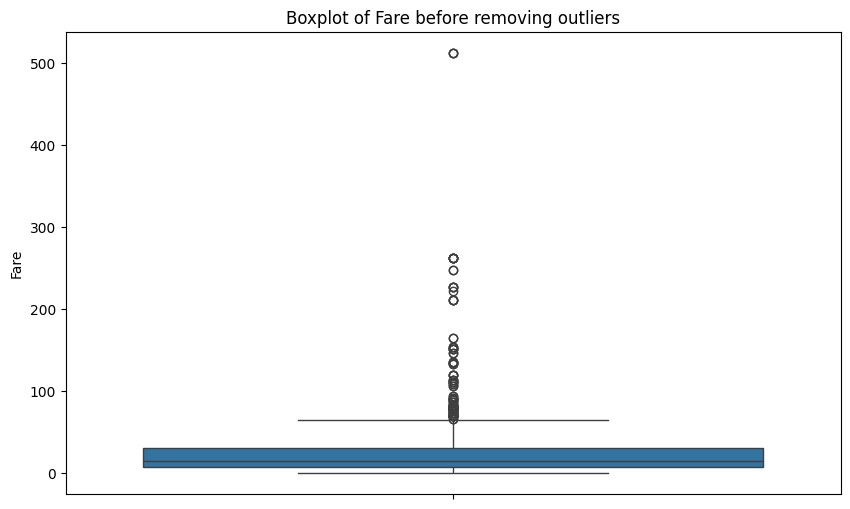

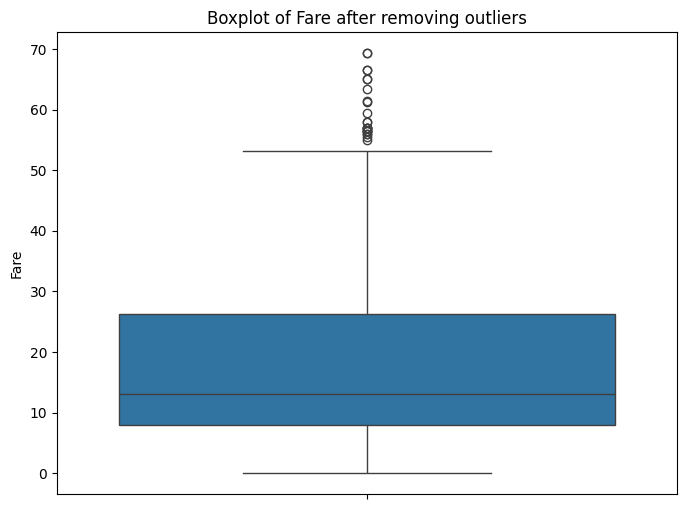

Original dataset shape: (891, 12)
Dataset shape after removing outliers: (607, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
6            7         0       1   

                                           Name     Sex   Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    male  22.0      1      0   
2                        Heikkinen, Miss. Laina  female  26.0      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
4                      Allen, Mr. William Henry    male  35.0      0      0   
6                       McCarthy, Mr. Timothy J    male  54.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN       

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
df = pd.read_csv('titanic.csv')

# Check the first few rows to see the structure
print(df.head())

# Visualize the boxplot before removing outliers
plt.figure(figsize=(10, 6))

# Boxplot before removing outliers
sns.boxplot(df['Fare'])
plt.title('Boxplot of Fare before removing outliers')
plt.show()

# Identifying numerical columns for outlier removal
numerical_cols = ['Age', 'Fare']

# Removing outliers using IQR for each numerical column
df_filtered = df.copy()  # To keep original dataset intact

for c in numerical_cols:
    Q1 = df_filtered[c].quantile(0.25)
    Q3 = df_filtered[c].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Removing rows with outliers in the specific column
    df_filtered= df_filtered[(df_filtered[c] >= lower_bound) & (df_filtered[c] <= upper_bound)]

# Visualize the boxplot after removing outliers
plt.figure(figsize=(8, 6))

# Boxplot after removing outliers
sns.boxplot(df_filtered['Fare'])
plt.title('Boxplot of Fare after removing outliers')
plt.show()

# Optionally, check the shapes of both datasets
print("Original dataset shape:", df.shape)
print("Dataset shape after removing outliers:", df_filtered.shape)
print(df_filtered.head())

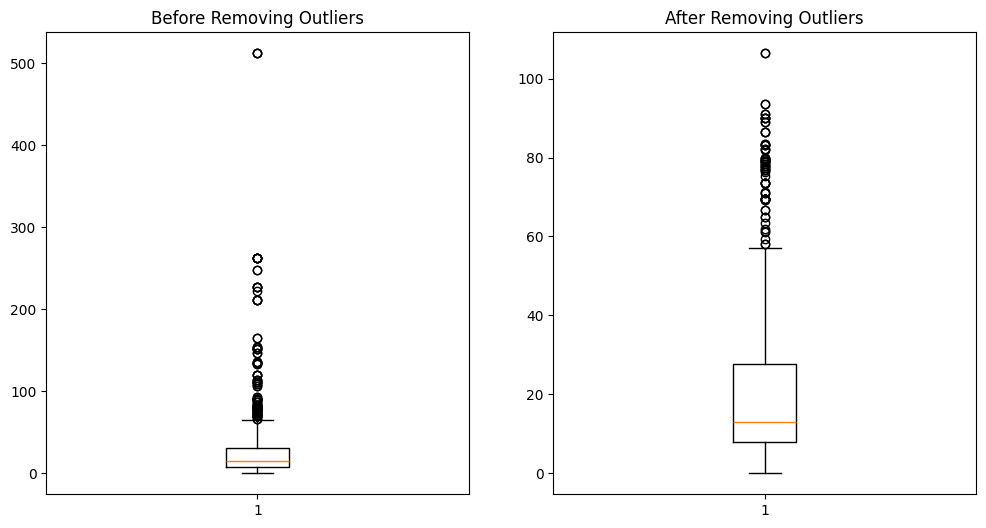

Data after removing outliers (Z-score method):
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0

In [34]:
from sklearn.preprocessing import StandardScaler

# Reshape data for scaling
data_reshaped = df[['Fare']].values  

# Use StandardScaler to compute Z-scores
scaler = StandardScaler()
z_scores = scaler.fit_transform(data_reshaped)

# Define a threshold (commonly 3)
threshold = 1.5
df_filtered_z = df[np.abs(z_scores) < threshold]

# Plot before and after removing outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.boxplot(df['Fare'])
ax1.set_title("Before Removing Outliers")

ax2.boxplot(df_filtered_z['Fare'])
ax2.set_title("After Removing Outliers")

plt.show()

print("Data after removing outliers (Z-score method):")
print(df_filtered_z.head())

### Feature Selection

In [44]:
import pandas as pd

def load_titanic_data(TITANIC_PATH):
 return pd.read_csv(TITANIC_PATH)

titanic = load_titanic_data("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


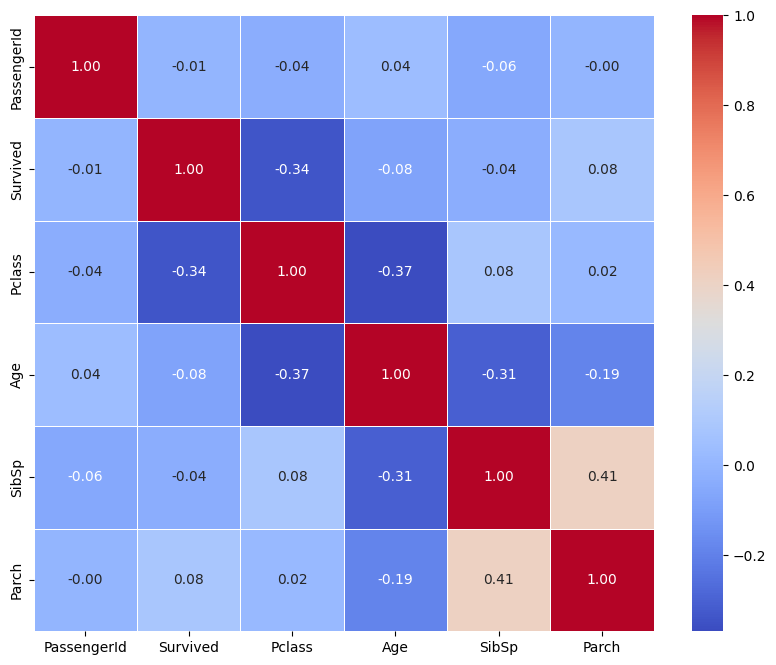

Highly correlated columns to drop: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch']


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load your data (example with Titanic dataset)
df = pd.read_csv('titanic.csv')  # Adjust with the path to your dataset

# Select only numeric columns for correlation (excluding non-numeric columns)
df_numeric = df.select_dtypes(include=[np.number])

# Drop 'Fare' column (or any other columns you want to drop)
df_numeric = df_numeric.drop(columns=['Fare'])

# Calculate correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.show()

# Drop highly correlated features (e.g., correlation > 0.9)
corr_threshold = 0.9
to_drop = [column for column in corr_matrix.columns if any(abs(corr_matrix[column]) > corr_threshold)]
print("Highly correlated columns to drop:", to_drop)


### Principal Component Analysis (PCA)

In [66]:
import pandas as pd

# Load the dataset
df = pd.read_csv("titanic.csv")  # Replace with actual dataset path
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['median_titanic_value'], errors='ignore')  # Drop target if applicable

# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

In [69]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # You can also use "median" or "most_frequent"
scaled_data = imputer.fit_transform(scaled_data)

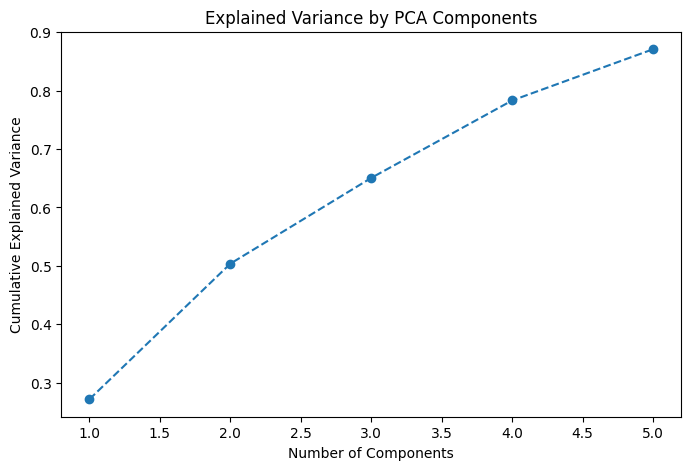

In [70]:
# manually 
from sklearn.decomposition import PCA

# Choose the number of components
pca = PCA(n_components=5)  # Adjust based on variance explained
pca_features = pca.fit_transform(scaled_data)

# Convert to DataFrame
pca_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(5)])


import matplotlib.pyplot as plt

explained_variance = pca.explained_variance_ratio_

# Plot cumulative variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.show()

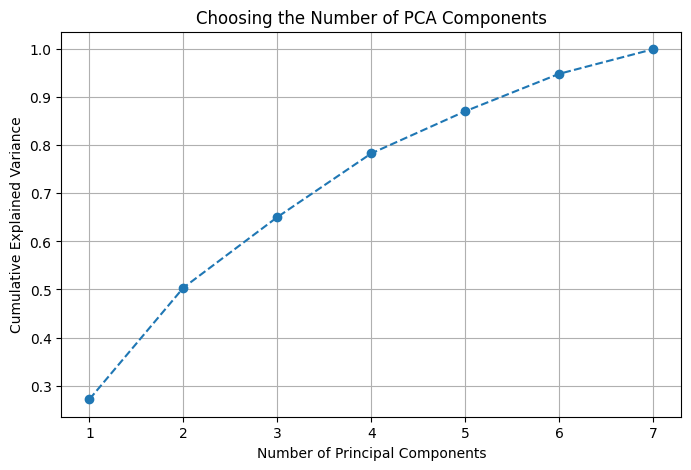

In [71]:
# automate the n component

from sklearn.decomposition import PCA
import numpy as np

# Apply PCA without specifying components (to analyze all)
pca = PCA()
pca.fit(scaled_data)

# Calculate cumulative variance explained
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Choosing the Number of PCA Components")
plt.grid()
plt.show()